## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
# 把兩個訓練資料集和測試資料集讀進來

Titanic_test = pd.read_csv('C:/Users/Sue Lin/ML100Days/EDA/Titanic_test.csv')
Titanic_train = pd.read_csv('C:/Users/Sue Lin/ML100Days/EDA/Titanic_train.csv') 

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [5]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
display(Titanic_test.head(5))
display(Titanic_train.head(5))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [6]:
#可以嘗試用範例的程式

# 哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(Titanic_test.isnull().any())

# 統計 data 裡有空值的變數個數
print(Titanic_test.isnull().any().sum())


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


In [7]:
## A2 : Test 資料集 Age, Fare, Cabin 有缺失值

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [13]:
#合併資料


In [13]:
concat= [Titanic_train, Titanic_test]
Titanic_all = pd.concat(concat)

In [14]:
display(Titanic_all)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
print(Titanic_all.info())
print('cabin 遺失個數=',Titanic_all['Cabin'].isnull().sum())
print('Survived 遺失個數=',Titanic_all['Survived'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB
None
cabin 遺失個數= 0
Survived 遺失個數= 418


In [22]:
print(Titanic_all["Cabin"].value_counts())

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C78                4
                  ..
A6                 1
F                  1
E36                1
B86                1
B19                1
Name: Cabin, Length: 186, dtype: int64


In [24]:
#* 方法1:遺失的屬於另一類。 
Titanic_all['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [25]:
Titanic_all["Cabin"] = Titanic_all['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')


In [26]:
Titanic_all['Cabin'].head(10)

0    NoCabin
1          C
2    NoCabin
3          C
4    NoCabin
5    NoCabin
6          E
7    NoCabin
8    NoCabin
9    NoCabin
Name: Cabin, dtype: object

In [27]:
print(Titanic_all["Cabin"].value_counts())

NoCabin    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Cabin, dtype: int64


In [28]:
Titanic_all["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

c:\users\sue lin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


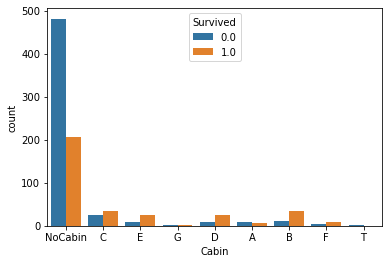

In [30]:
#調整後的 Cabin 觀察遺失的樣態
sns.countplot(Titanic_all['Cabin'], hue=Titanic_all['Survived'])
#結論，遺失的死亡率比較高

c:\users\sue lin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


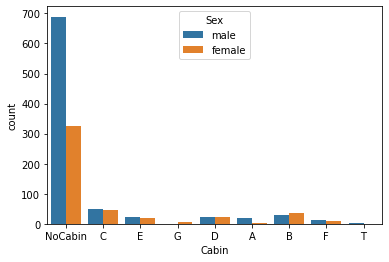

In [31]:
#調整後的 Cabin 觀察遺失的樣態
sns.countplot(Titanic_all['Cabin'], hue=Titanic_all['Sex'])
#結論，遺失的男性比較多

In [35]:
Titanic_all['Sex'] =Titanic_all['Sex'].map({'male': 1,'female': 0})

In [36]:
Titanic_all['Sex'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64

In [37]:
#數值計算
Titanic_all[['Cabin', 'Sex']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Sex', ascending=False)
# NoCabin的比例和 F 較接近 # female=0;male=1

,Cabin,Sex
8,T,1.000000
0,A,0.818182
7,NoCabin,0.679487
5,F,0.619048
4,E,0.536585
2,C,0.510638
3,D,0.500000
1,B,0.446154
6,G,0.000000


F    1035
C      94
B      65
D      46
E      41
A      22
G       5
T       1
Name: Cabin, dtype: int64


c:\users\sue lin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


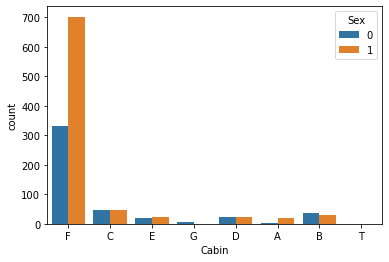

In [39]:
# 進行 no cabin 補 F
# 連續型用分布圖行來看
print(Titanic_all["Cabin"].value_counts())
sns.countplot(Titanic_all['Cabin'], hue=Titanic_all['Sex'])
